In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from skimage import io, color, transform, feature, filters
from my_measures import BinaryClassificationPerformance  
from sklearn.model_selection import train_test_split
%matplotlib inline
from skimage.feature import corner_foerstner, corner_peaks
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import data, exposure

### IMPORTANT!!! Make sure you are using BinaryClassificationPerformance v1.03


In [2]:
#help(BinaryClassificationPerformance)

### file paths and names

In [3]:
ci_path = 'plane_data/cropped_images/' # file path for cropped images for training
l_file = 'plane_data/plane_labels.csv' # file path and file name for csv with labels

# Function for feature building and extraction on photographs¶

scikit-image documentation on methods used for feature extraction:  

* http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2gray  
* http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize  
* http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.canny

In [4]:
# in downscaling the image, what do you want the new dimensions to be?
# the original dimensions of cropped images: (60, 140), which if 8,400 pixels
dims = (15, 35) # 25% of the original size, 525 pixels
dims = (30, 70) # 25% of the original size, 525 pixels

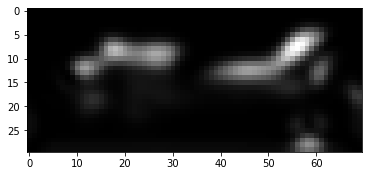

downscaled image shape: 
(30, 70)
<class 'numpy.ndarray'>
image representation (first row of pixels): 
[-7.79073678e-05 -9.83784677e-05 -2.35176504e-04 -4.81898974e-04
 -7.50642716e-04 -9.68962501e-04 -1.08666886e-03 -1.07101693e-03
 -9.35732090e-04 -7.45341154e-04 -5.74759795e-04 -4.68442398e-04
 -4.26417379e-04 -4.21197487e-04 -4.25625405e-04 -4.27044463e-04
 -4.26662250e-04 -4.33296916e-04 -4.56885965e-04 -5.05867980e-04
 -5.88268910e-04 -7.12579377e-04 -8.86432139e-04 -1.10786495e-03
 -1.34671200e-03 -1.54204411e-03 -1.64082550e-03 -1.64405330e-03
 -1.60402000e-03 -1.58400253e-03 -1.63246130e-03 -1.77460419e-03
 -1.98917854e-03 -2.17720768e-03 -2.20127128e-03 -2.01262982e-03
 -1.70364416e-03 -1.41101142e-03 -1.21409124e-03 -1.10278407e-03
 -1.00411731e-03 -8.59356205e-04 -6.75633631e-04 -5.00261149e-04
 -3.72791500e-04 -3.05210583e-04 -2.83695191e-04 -2.82211250e-04
 -2.79427827e-04 -2.67551035e-04 -2.52242882e-04 -2.47004021e-04
 -2.65042475e-04 -3.14321255e-04 -3.98033208e-04 -5.

In [25]:
def image_manipulation(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname, as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
    
    
    final_image = feature.corner_harris(downscaled, method = "k", k=0.25, eps=1e-06, sigma=2) 

    #final_image = feature.corner_shi_tomasi(downscaled, sigma=1) 
    #final_image = feature.canny(final_image) # edge filter image with Canny algorithm
    #final_image = hog(img_raw, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    
    if imview==True:
        plt.figure()
        plt.imshow(final_image, cmap='Greys')
        plt.show()
    warnings.filterwarnings('always')
    return final_image

# test the function, look at input/output
test_image = image_manipulation('2017-08-25T23+24+13_390Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print(type(test_image))
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

downscaled image shape: 
(60, 140)
image representation (first row of pixels): 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


example of transformation: 


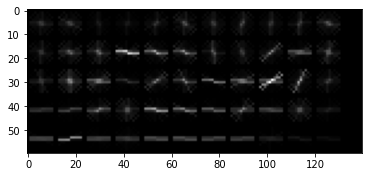

In [6]:
#this is where you do the bulk of the changing
def image_manipulation(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname)    
    fd, hogImg = hog(img_raw, orientations=10, pixels_per_cell=(12, 12), cells_per_block=(6, 6), visualize=True)
    downscaled = transform.resize(hogImg, (dims[0], dims[1])) # downscale image
    final_img = filters.roberts(downscaled)
    final_img = filters.sobel(hogImg)
    final_img = filters.roberts(hogImg)
    final_img = hogImg
#     final_image = feature.canny(downscaled) 
    if imview==True:
     plt.imshow(final_img, cmap=plt.cm.gray)
    warnings.filterwarnings('always')
    return final_img

# test the function, look at input/output
test_image = image_manipulation('2016-10-10T19+44+49_610Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

for comparison, look at original image:

In [7]:
#this_imname = ci_path + '2017-08-25T23+24+13_390Z.png'
#io.imshow(io.imread(this_imname))

# function to process raw images, resulting in training and test datasets

In [26]:
# function that takes raw images and completes all preprocessing required before model fits
def process_raw_data(labels_fn, images_fp, my_random_seed, imview=False, test=False):
    plane_data = pd.read_csv(labels_fn) # read in photograph labels
    print("First few lines of image labels: ")
    print(plane_data.head())
    print("Size of image label dataFrame: ")
    print(plane_data.shape)
        
    # construct lists for features, labels, and a crosswalk reference to image names
    features_list = []
    if (not test):
        y_list = []
    imnames_list = []

    for index, row in plane_data.iterrows():
        features_list.append(image_manipulation(row['img_name'], images_fp))
        if (not test):
            y_list.append(row['plane'])
        imnames_list.append(row['img_name'])
    
    # convert the lists to ndarrays
    features = np.asarray(features_list)
    if (not test):
        Y = np.asarray(y_list)
    imgs = np.asarray(imnames_list)
    print('Shape of original feature representation: ')
    print(features.shape)

    # flatten the images ndarray to one row per image
    features_flat = features.reshape((features.shape[0], -1))

    print('Shape of flat feature representation: ')
    print(features_flat.shape)

    if (not test):
        print('Shape of Y: ')
        print(Y.shape)

        print('Number of images with planes: ')
        print(Y.sum())
    
        # create train and test sets
        data_train, data_test, y_train, y_test, imgs_train, imgs_test = train_test_split(features_flat, 
            Y, imgs, test_size = 0.25, random_state = my_random_seed)

        print('Shape of training set: ')
        print(y_train.shape)
        print('Number of training images that contain an airplane: ')
        print(y_train.sum())

        print('Shape of test set: ')
        print(y_test.shape)
        print('Number of test images that contain an airplane: ')
        print(y_test.sum())
    
    if (test):
        X_submission_test = features_flat
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(X_submission_test, plane_data)
    else: 
        print("Shape of data_train and data_test:")
        print(data_train.shape)
        print(data_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of imgs_train and imgs_test:")
        print(imgs_train.shape)
        print(imgs_test.shape)
        print('SUCCESS!')
        return(data_train, data_test, y_train, y_test, imgs_train, imgs_test)


In [27]:
data_train, data_test, y_train, y_test, imgs_train, imgs_test = process_raw_data(l_file, ci_path, 
    my_random_seed=17, imview=False, test=False)

First few lines of image labels: 
                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
Size of image label dataFrame: 
(6758, 2)
Shape of original feature representation: 
(6758, 30, 70)
Shape of flat feature representation: 
(6758, 2100)
Shape of Y: 
(6758,)
Number of images with planes: 
101
Shape of training set: 
(5068,)
Number of training images that contain an airplane: 
76
Shape of test set: 
(1690,)
Number of test images that contain an airplane: 
25
Shape of data_train and data_test:
(5068, 2100)
(1690, 2100)
Shape of y_train and y_test:
(5068,)
(1690,)
Shape of imgs_train and imgs_test:
(5068,)
(1690,)
SUCCESS!


# train Perceptron

In [10]:
# MODEL: Perceptron
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(data_train, y_train)

prc_performance = BinaryClassificationPerformance(prc.predict(data_train), y_train, 'prc')
prc_performance.compute_measures()
prc_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(prc_performance.performance_measures)

prc_performance_test = BinaryClassificationPerformance(prc.predict(data_test), y_test, 'prc')
prc_performance_test.compute_measures()
prc_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(prc_performance_test.performance_measures)

prc_performance_test.img_indices()
prc_img_indices_to_view = prc_performance_test.image_indices

TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 20, 'TN': 1664, 'FP': 1, 'FN': 5, 'Accuracy': 0.9964497041420118, 'Precision': 0.9523809523809523, 'Recall': 0.8, 'desc': 'prc', 'set': 'test'}


In [14]:
# MODEL: Perceptron
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(data_train, y_train)

prc_performance = BinaryClassificationPerformance(prc.predict(data_train), y_train, 'prc')
prc_performance.compute_measures()
prc_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(prc_performance.performance_measures)

prc_performance_test = BinaryClassificationPerformance(prc.predict(data_test), y_test, 'prc')
prc_performance_test.compute_measures()
prc_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(prc_performance_test.performance_measures)

prc_performance_test.img_indices()
prc_img_indices_to_view = prc_performance_test.image_indices

TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 21, 'TN': 1665, 'FP': 0, 'FN': 4, 'Accuracy': 0.9976331360946745, 'Precision': 1.0, 'Recall': 0.84, 'desc': 'prc', 'set': 'test'}


In [13]:
def performance_examples(typ, measures):
    iiv = ''
    if typ == 'FP':
        iiv = typ + '_indices'
    elif typ == 'TP':
        iiv = typ + '_indices'
    elif typ == 'FN':
        iiv = typ + '_indices'
    else:
        raise ValueError('input must be "TP", "FP", or "FN"')
    for img in measures[iiv]:
        warnings.filterwarnings('ignore')    
        plt.figure()
        lookat = ci_path + imgs_test[img] + '.png' # location of original image
        io.imshow(lookat) # show original image
        plt.figure()
        plt.imshow(data_test[img].reshape(dims[0], dims[1])) # show manipulation for feature representation
        warnings.filterwarnings('always')


# look at examples of Perceptron classifications

## true positives

In [11]:
#performance_examples('TP', prc_img_indices_to_view)

## false positives

In [12]:
#performance_examples('FP', prc_img_indices_to_view)

## false negatives

In [13]:
#performance_examples('FN', prc_img_indices_to_view)

# train Multilayer Perceptron, a.k.a. neural network

In [17]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn = neural_network.MLPClassifier(hidden_layer_sizes = (100, 100), max_iter=1000)
print(nn)
nn.fit(data_train, y_train)

nn_performance = BinaryClassificationPerformance(nn.predict(data_train), y_train, 'nn')
nn_performance.compute_measures()
nn_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn_performance.performance_measures)

nn_performance_test = BinaryClassificationPerformance(nn.predict(data_test), y_test, 'nn_test')
nn_performance_test.compute_measures()
nn_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn_performance_test.performance_measures)

nn_performance_test.img_indices()
nn_img_indices_to_view = nn_performance_test.image_indices

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 19, 'TN': 1665, 'FP': 0, 'FN': 6, 'Accuracy': 0.9964497041420118, 'Precision': 1.0, 'Recall': 0.76, 'desc': 'nn_test', 'set': 'test'}


In [18]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn1 = neural_network.MLPClassifier(hidden_layer_sizes = (100), max_iter=1000)
print(nn1)
nn1.fit(data_train, y_train)

nn1_performance = BinaryClassificationPerformance(nn1.predict(data_train), y_train, 'nn1')
nn1_performance.compute_measures()
nn1_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn1_performance.performance_measures)

nn1_performance_test = BinaryClassificationPerformance(nn1.predict(data_test), y_test, 'nn1_test')
nn1_performance_test.compute_measures()
nn1_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn1_performance_test.performance_measures)

nn1_performance_test.img_indices()
nn1_img_indices_to_view = nn1_performance_test.image_indices

MLPClassifier(hidden_layer_sizes=100, max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn1', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 18, 'TN': 1665, 'FP': 0, 'FN': 7, 'Accuracy': 0.9958579881656805, 'Precision': 1.0, 'Recall': 0.72, 'desc': 'nn1_test', 'set': 'test'}


In [14]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn2 = neural_network.MLPClassifier(hidden_layer_sizes = (1000), max_iter=1000)
print(nn2)
nn2.fit(data_train, y_train)

nn2_performance = BinaryClassificationPerformance(nn2.predict(data_train), y_train, 'nn2')
nn2_performance.compute_measures()
nn2_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn2_performance.performance_measures)

nn2_performance_test = BinaryClassificationPerformance(nn2.predict(data_test), y_test, 'nn2_test')
nn2_performance_test.compute_measures()
nn2_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn2_performance_test.performance_measures)

nn2_performance_test.img_indices()
nn2_img_indices_to_view = nn2_performance_test.image_indices

MLPClassifier(hidden_layer_sizes=1000, max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn2', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 20, 'TN': 1664, 'FP': 1, 'FN': 5, 'Accuracy': 0.9964497041420118, 'Precision': 0.9523809523809523, 'Recall': 0.8, 'desc': 'nn2_test', 'set': 'test'}


In [15]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn3 = neural_network.MLPClassifier(hidden_layer_sizes = (10000), max_iter=1000)
print(nn3)
nn3.fit(data_train, y_train)

nn3_performance = BinaryClassificationPerformance(nn3.predict(data_train), y_train, 'nn3')
nn3_performance.compute_measures()
nn3_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn3_performance.performance_measures)

nn3_performance_test = BinaryClassificationPerformance(nn3.predict(data_test), y_test, 'nn3_test')
nn3_performance_test.compute_measures()
nn3_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn3_performance_test.performance_measures)

nn3_performance_test.img_indices()
nn3_img_indices_to_view = nn3_performance_test.image_indices

MLPClassifier(hidden_layer_sizes=10000, max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn3', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 20, 'TN': 1665, 'FP': 0, 'FN': 5, 'Accuracy': 0.9970414201183432, 'Precision': 1.0, 'Recall': 0.8, 'desc': 'nn3_test', 'set': 'test'}


In [18]:
# MODEL: Multi-layer Perceptron aka neural network
'''
from sklearn import neural_network
nn4 = neural_network.MLPClassifier(hidden_layer_sizes = (100000), max_iter=1000)
print(nn4)
nn4.fit(data_train, y_train)

nn4_performance = BinaryClassificationPerformance(nn4.predict(data_train), y_train, 'nn4')
nn4_performance.compute_measures()
nn4_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn4_performance.performance_measures)

nn4_performance_test = BinaryClassificationPerformance(nn4.predict(data_test), y_test, 'nn4_test')
nn4_performance_test.compute_measures()
nn4_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn4_performance_test.performance_measures)

nn4_performance_test.img_indices()
nn4_img_indices_to_view = nn4_performance_test.image_indices
'''

"\nfrom sklearn import neural_network\nnn4 = neural_network.MLPClassifier(hidden_layer_sizes = (100000), max_iter=1000)\nprint(nn4)\nnn4.fit(data_train, y_train)\n\nnn4_performance = BinaryClassificationPerformance(nn4.predict(data_train), y_train, 'nn4')\nnn4_performance.compute_measures()\nnn4_performance.performance_measures['set'] = 'train'\nprint('TRAINING SET: ')\nprint(nn4_performance.performance_measures)\n\nnn4_performance_test = BinaryClassificationPerformance(nn4.predict(data_test), y_test, 'nn4_test')\nnn4_performance_test.compute_measures()\nnn4_performance_test.performance_measures['set'] = 'test'\nprint('TEST SET: ')\nprint(nn4_performance_test.performance_measures)\n\nnn4_performance_test.img_indices()\nnn4_img_indices_to_view = nn4_performance_test.image_indices\n"

In [19]:
# MODEL: Multi-layer Perceptron aka neural network

'''
from sklearn import neural_network
nn5 = neural_network.MLPClassifier(hidden_layer_sizes = (1000000), max_iter=1000)
print(nn5)
nn5.fit(data_train, y_train)

nn5_performance = BinaryClassificationPerformance(nn5.predict(data_train), y_train, 'nn5')
nn5_performance.compute_measures()
nn5_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn5_performance.performance_measures)

nn5_performance_test = BinaryClassificationPerformance(nn5.predict(data_test), y_test, 'nn5_test')
nn5_performance_test.compute_measures()
nn5_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn5_performance_test.performance_measures)

nn5_performance_test.img_indices()
nn5_img_indices_to_view = nn5_performance_test.image_indices
'''



"\nfrom sklearn import neural_network\nnn5 = neural_network.MLPClassifier(hidden_layer_sizes = (1000000), max_iter=1000)\nprint(nn5)\nnn5.fit(data_train, y_train)\n\nnn5_performance = BinaryClassificationPerformance(nn5.predict(data_train), y_train, 'nn5')\nnn5_performance.compute_measures()\nnn5_performance.performance_measures['set'] = 'train'\nprint('TRAINING SET: ')\nprint(nn5_performance.performance_measures)\n\nnn5_performance_test = BinaryClassificationPerformance(nn5.predict(data_test), y_test, 'nn5_test')\nnn5_performance_test.compute_measures()\nnn5_performance_test.performance_measures['set'] = 'test'\nprint('TEST SET: ')\nprint(nn5_performance_test.performance_measures)\n\nnn5_performance_test.img_indices()\nnn5_img_indices_to_view = nn5_performance_test.image_indices\n"

## nLayers

In [16]:
# MODEL: Multi-layer Perceptron aka neural network
'''
from sklearn import neural_network
nn6 = neural_network.MLPClassifier(hidden_layer_sizes = (1000), max_iter=1000)
print(nn6)
nn6.fit(data_train, y_train)

nn6_performance = BinaryClassificationPerformance(nn6.predict(data_train), y_train, 'nn6')
nn6_performance.compute_measures()
nn6_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn6_performance.performance_measures)

nn6_performance_test = BinaryClassificationPerformance(nn6.predict(data_test), y_test, 'nn6_test')
nn6_performance_test.compute_measures()
nn6_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn6_performance_test.performance_measures)

nn6_performance_test.img_indices()
nn6_img_indices_to_view = nn6_performance_test.image_indices
'''

"\nfrom sklearn import neural_network\nnn6 = neural_network.MLPClassifier(hidden_layer_sizes = (1000), max_iter=1000)\nprint(nn6)\nnn6.fit(data_train, y_train)\n\nnn6_performance = BinaryClassificationPerformance(nn6.predict(data_train), y_train, 'nn6')\nnn6_performance.compute_measures()\nnn6_performance.performance_measures['set'] = 'train'\nprint('TRAINING SET: ')\nprint(nn6_performance.performance_measures)\n\nnn6_performance_test = BinaryClassificationPerformance(nn6.predict(data_test), y_test, 'nn6_test')\nnn6_performance_test.compute_measures()\nnn6_performance_test.performance_measures['set'] = 'test'\nprint('TEST SET: ')\nprint(nn6_performance_test.performance_measures)\n\nnn6_performance_test.img_indices()\nnn6_img_indices_to_view = nn6_performance_test.image_indices\n"

In [17]:
# MODEL: Multi-layer Perceptron aka neural network

from sklearn import neural_network
nn7 = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 100, 100, 100, 10), max_iter=1000)
print(nn7)
nn7.fit(data_train, y_train)

nn7_performance = BinaryClassificationPerformance(nn7.predict(data_train), y_train, 'nn7')
nn7_performance.compute_measures()
nn7_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn7_performance.performance_measures)

nn7_performance_test = BinaryClassificationPerformance(nn7.predict(data_test), y_test, 'nn7_test')
nn7_performance_test.compute_measures()
nn7_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn7_performance_test.performance_measures)

nn7_performance_test.img_indices()
nn7_img_indices_to_view = nn7_performance_test.image_indices


MLPClassifier(hidden_layer_sizes=(1000, 100, 100, 100, 10), max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn7', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 21, 'TN': 1664, 'FP': 1, 'FN': 4, 'Accuracy': 0.9970414201183432, 'Precision': 0.9545454545454546, 'Recall': 0.84, 'desc': 'nn7_test', 'set': 'test'}


In [34]:
# MODEL: Multi-layer Perceptron aka neural network

from sklearn import neural_network
nn7 = neural_network.MLPClassifier(hidden_layer_sizes = (100), max_iter=1000)
print(nn7)
nn7.fit(data_train, y_train)

nn7_performance = BinaryClassificationPerformance(nn7.predict(data_train), y_train, 'nn7')
nn7_performance.compute_measures()
nn7_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn7_performance.performance_measures)

nn7_performance_test = BinaryClassificationPerformance(nn7.predict(data_test), y_test, 'nn7_test')
nn7_performance_test.compute_measures()
nn7_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn7_performance_test.performance_measures)

nn7_performance_test.img_indices()
nn7_img_indices_to_view = nn7_performance_test.image_indices


MLPClassifier(hidden_layer_sizes=100, max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 75, 'TN': 4992, 'FP': 0, 'FN': 1, 'Accuracy': 0.999802683504341, 'Precision': 1.0, 'Recall': 0.9868421052631579, 'desc': 'nn7', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 20, 'TN': 1663, 'FP': 2, 'FN': 5, 'Accuracy': 0.9958579881656805, 'Precision': 0.9090909090909091, 'Recall': 0.8, 'desc': 'nn7_test', 'set': 'test'}


In [36]:
# MODEL: Multi-layer Perceptron aka neural network

from sklearn import neural_network
nn8 = neural_network.MLPClassifier(hidden_layer_sizes = ( 100, 10), max_iter=1000)
print(nn8)
nn8.fit(data_train, y_train)

nn8_performance = BinaryClassificationPerformance(nn8.predict(data_train), y_train, 'nn8')
nn8_performance.compute_measures()
nn8_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn7_performance.performance_measures)

nn8_performance_test = BinaryClassificationPerformance(nn8.predict(data_test), y_test, 'nn8_test')
nn8_performance_test.compute_measures()
nn8_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn8_performance_test.performance_measures)

nn8_performance_test.img_indices()
nn8_img_indices_to_view = nn8_performance_test.image_indices


MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 75, 'TN': 4992, 'FP': 0, 'FN': 1, 'Accuracy': 0.999802683504341, 'Precision': 1.0, 'Recall': 0.9868421052631579, 'desc': 'nn7', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 20, 'TN': 1663, 'FP': 2, 'FN': 5, 'Accuracy': 0.9958579881656805, 'Precision': 0.9090909090909091, 'Recall': 0.8, 'desc': 'nn8_test', 'set': 'test'}


In [74]:
# MODEL: Multi-layer Perceptron aka neural network

from sklearn import neural_network
nnx = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 500, 500, 100, 100, 10), max_iter=1000)
print(nnx)
nnx.fit(data_train, y_train)

nnx_performance = BinaryClassificationPerformance(nnx.predict(data_train), y_train, 'nnx')
nnx_performance.compute_measures()
nnx_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nnx_performance.performance_measures)

nnx_performance_test = BinaryClassificationPerformance(nnx.predict(data_test), y_test, 'nnx_test')
nnx_performance_test.compute_measures()
nnx_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nnx_performance_test.performance_measures)

nnx_performance_test.img_indices()
nnx_img_indices_to_view = nnx_performance_test.image_indices


MLPClassifier(hidden_layer_sizes=(1000, 500, 500, 100, 100, 10), max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nnx', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 22, 'TN': 1665, 'FP': 0, 'FN': 3, 'Accuracy': 0.9982248520710059, 'Precision': 1.0, 'Recall': 0.88, 'desc': 'nnx_test', 'set': 'test'}


In [79]:
# MODEL: Multi-layer Perceptron aka neural network

from sklearn import neural_network
nnxi = neural_network.MLPClassifier(hidden_layer_sizes = (5000, 1000, 500, 100, 100, 10), max_iter=1000)
print(nnx)
nnxi.fit(data_train, y_train)

nnxi_performance = BinaryClassificationPerformance(nnxi.predict(data_train), y_train, 'nnxi')
nnxi_performance.compute_measures()
nnxi_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nnxi_performance.performance_measures)

nnxi_performance_test = BinaryClassificationPerformance(nnx.predict(data_test), y_test, 'nnxi_test')
nnxi_performance_test.compute_measures()
nnxi_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nnxi_performance_test.performance_measures)

nnxi_performance_test.img_indices()
nnxi_img_indices_to_view = nnxi_performance_test.image_indices


MLPClassifier(hidden_layer_sizes=(1000, 500, 500, 100, 100, 10), max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 1328, 'FP': 3664, 'FN': 0, 'Accuracy': 0.2770323599052881, 'Precision': 0.020320855614973262, 'Recall': 1.0, 'desc': 'nnxi', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 22, 'TN': 1665, 'FP': 0, 'FN': 3, 'Accuracy': 0.9982248520710059, 'Precision': 1.0, 'Recall': 0.88, 'desc': 'nnxi_test', 'set': 'test'}


In [61]:
# MODEL: Multi-layer Perceptron aka neural network
# NEW FE + LAyers

from sklearn import neural_network
nn9 = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000, 500, 500, 100, 100, 100, 10), max_iter=1000)
print(nn9)
nn9.fit(data_train, y_train)

nn9_performance = BinaryClassificationPerformance(nn9.predict(data_train), y_train, 'nn9')
nn9_performance.compute_measures()
nn9_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn9_performance.performance_measures)

nn9_performance_test = BinaryClassificationPerformance(nn9.predict(data_test), y_test, 'nn9_test')
nn9_performance_test.compute_measures()
nn9_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn9_performance_test.performance_measures)

nn9_performance_test.img_indices()
nn9_img_indices_to_view = nn9_performance_test.image_indices


MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 500, 500, 500, 500, 100,
                                  10),
              max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn9', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 22, 'TN': 1663, 'FP': 2, 'FN': 3, 'Accuracy': 0.9970414201183432, 'Precision': 0.9166666666666666, 'Recall': 0.88, 'desc': 'nn9_test', 'set': 'test'}


In [34]:
# MODEL: Multi-layer Perceptron aka neural network
'''
from sklearn import neural_network
nn8 = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000), max_iter=1000)
print(nn8)
nn8.fit(data_train, y_train)

nn8_performance = BinaryClassificationPerformance(nn8.predict(data_train), y_train, 'nn8')
nn8_performance.compute_measures()
nn8_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn8_performance.performance_measures)

nn8_performance_test = BinaryClassificationPerformance(nn8.predict(data_test), y_test, 'nn8_test')
nn8_performance_test.compute_measures()
nn8_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn8_performance_test.performance_measures)

nn8_performance_test.img_indices()
nn8_img_indices_to_view = nn8_performance_test.image_indices
'''

"\nfrom sklearn import neural_network\nnn8 = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000), max_iter=1000)\nprint(nn8)\nnn8.fit(data_train, y_train)\n\nnn8_performance = BinaryClassificationPerformance(nn8.predict(data_train), y_train, 'nn8')\nnn8_performance.compute_measures()\nnn8_performance.performance_measures['set'] = 'train'\nprint('TRAINING SET: ')\nprint(nn8_performance.performance_measures)\n\nnn8_performance_test = BinaryClassificationPerformance(nn8.predict(data_test), y_test, 'nn8_test')\nnn8_performance_test.compute_measures()\nnn8_performance_test.performance_measures['set'] = 'test'\nprint('TEST SET: ')\nprint(nn8_performance_test.performance_measures)\n\nnn8_performance_test.img_indices()\nnn8_img_indices_to_view = nn8_performance_test.image_indices\n"

In [18]:
# MODEL: Multi-layer Perceptron aka neural network
'''
from sklearn import neural_network
nn9 = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000, 1000), max_iter=1000)
print(nn9)
nn9.fit(data_train, y_train)

nn9_performance = BinaryClassificationPerformance(nn9.predict(data_train), y_train, 'nn9')
nn9_performance.compute_measures()
nn9_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn9_performance.performance_measures)

nn9_performance_test = BinaryClassificationPerformance(nn9.predict(data_test), y_test, 'nn9_test')
nn9_performance_test.compute_measures()
nn9_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn9_performance_test.performance_measures)

nn9_performance_test.img_indices()
nn9_img_indices_to_view = nn9_performance_test.image_indices
'''

MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000), max_iter=1000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn9', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 21, 'TN': 1662, 'FP': 3, 'FN': 4, 'Accuracy': 0.9958579881656805, 'Precision': 0.875, 'Recall': 0.84, 'desc': 'nn9_test', 'set': 'test'}


In [19]:
# MODEL: Multi-layer Perceptron aka neural network
'''
from sklearn import neural_network
nnx = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000, 1000, 1000), max_iter=1000)
print(nnx)
nnx.fit(data_train, y_train)

nnx_performance = BinaryClassificationPerformance(nnx.predict(data_train), y_train, 'nnx')
nnx_performance.compute_measures()
nnx_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nnx_performance.performance_measures)

nnx_performance_test = BinaryClassificationPerformance(nnx.predict(data_test), y_test, 'nnx_test')
nnx_performance_test.compute_measures()
nnx_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nnx_performance_test.performance_measures)

nnx_performance_test.img_indices()
nnx_img_indices_to_view = nnx_performance_test.image_indices
'''

"\nfrom sklearn import neural_network\nnnx = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000, 1000, 1000), max_iter=1000)\nprint(nnx)\nnnx.fit(data_train, y_train)\n\nnnx_performance = BinaryClassificationPerformance(nnx.predict(data_train), y_train, 'nnx')\nnnx_performance.compute_measures()\nnnx_performance.performance_measures['set'] = 'train'\nprint('TRAINING SET: ')\nprint(nnx_performance.performance_measures)\n\nnnx_performance_test = BinaryClassificationPerformance(nnx.predict(data_test), y_test, 'nnx_test')\nnnx_performance_test.compute_measures()\nnnx_performance_test.performance_measures['set'] = 'test'\nprint('TEST SET: ')\nprint(nnx_performance_test.performance_measures)\n\nnnx_performance_test.img_indices()\nnnx_img_indices_to_view = nnx_performance_test.image_indices\n"

In [20]:
# MODEL: Multi-layer Perceptron aka neural network
'''
from sklearn import neural_network
nnxi = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000, 1000, 1000, 1000), max_iter=1000)
print(nnxi)
nnxi.fit(data_train, y_train)

nnxi_performance = BinaryClassificationPerformance(nnxi.predict(data_train), y_train, 'nnxi')
nnxi_performance.compute_measures()
nnxi_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nnxi_performance.performance_measures)

nnxi_performance_test = BinaryClassificationPerformance(nnxi.predict(data_test), y_test, 'nnxi_test')
nnxi_performance_test.compute_measures()
nnxi_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nnxi_performance_test.performance_measures)

nnxi_performance_test.img_indices()
nnxi_img_indices_to_view = nnxi_performance_test.image_indices
'''

"\nfrom sklearn import neural_network\nnnxi = neural_network.MLPClassifier(hidden_layer_sizes = (1000, 1000, 1000, 1000, 1000, 1000), max_iter=1000)\nprint(nnxi)\nnnxi.fit(data_train, y_train)\n\nnnxi_performance = BinaryClassificationPerformance(nnxi.predict(data_train), y_train, 'nnxi')\nnnxi_performance.compute_measures()\nnnxi_performance.performance_measures['set'] = 'train'\nprint('TRAINING SET: ')\nprint(nnxi_performance.performance_measures)\n\nnnxi_performance_test = BinaryClassificationPerformance(nnxi.predict(data_test), y_test, 'nnxi_test')\nnnxi_performance_test.compute_measures()\nnnxi_performance_test.performance_measures['set'] = 'test'\nprint('TEST SET: ')\nprint(nnxi_performance_test.performance_measures)\n\nnnxi_performance_test.img_indices()\nnnxi_img_indices_to_view = nnxi_performance_test.image_indices\n"

# look at examples of neural network classifications

## true positives

In [550]:
#performance_examples('TP', nn_img_indices_to_view)

## false positives

In [551]:
#performance_examples('FP', nn_img_indices_to_view)

## false negatives

In [552]:
#performance_examples('FN', nn_img_indices_to_view)

# comparisons

In [553]:
# list of fits to compare: 
final_fits = []
final_fits.append(prc_performance.performance_measures)
final_fits.append(prc_performance_test.performance_measures)
final_fits.append(nn_performance.performance_measures)
final_fits.append(nn_performance_test.performance_measures)

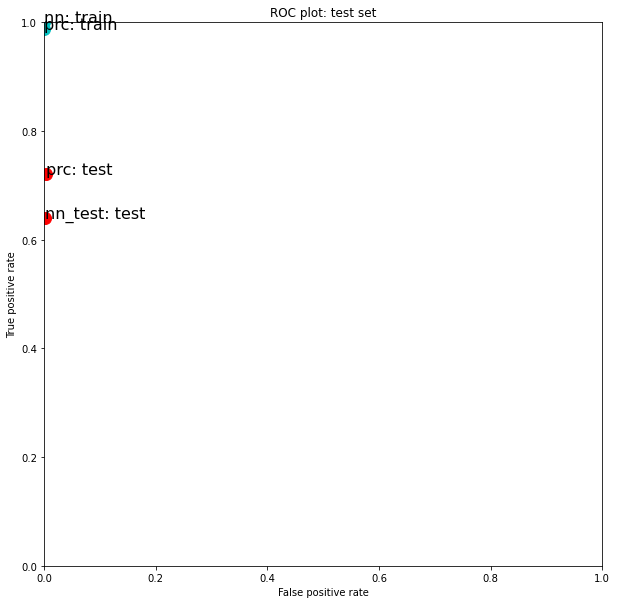

In [554]:
plt.figure(figsize=(10,10))

for fit in final_fits:
    if fit['set'] == 'train':
        color = 'co'
    else:
        color = 'ro'
    plt.plot(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], color, markersize=12)
    plt.text(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


In [ ]:
# list of fits to compare: 
final_fits = []
final_fits.append(prc_performance.performance_measures)
final_fits.append(prc_performance_test.performance_measures)
final_fits.append(nn_performance.performance_measures)
final_fits.append(nn_performance_test.performance_measures)

In [37]:
# list of fits to compare:
final_fitsN = []

final_fitsN.append(prc_performance.performance_measures)
final_fitsN.append(prc_performance_test.performance_measures)

#final_fitsN.append(nn_performance.performance_measures)
#final_fitsN.append(nn_performance_test.performance_measures)

#final_fitsN.append(nn1_performance.performance_measures)
#final_fitsN.append(nn1_performance_test.performance_measures)

#final_fitsN.append(nn2_performance.performance_measures)
#final_fitsN.append(nn2_performance_test.performance_measures)

#final_fitsN.append(nn3_performance.performance_measures)
#final_fitsN.append(nn3_performance_test.performance_measures)

#final_fitsN.append(nn7_performance.performance_measures)
#final_fitsN.append(nn7_performance_test.performance_measures)

#final_fitsN.append(nn8_performance.performance_measures)
#final_fitsN.append(nn8_performance_test.performance_measures)

#final_fitsN.append(nn9_performance.performance_measures)
#final_fitsN.append(nn9_performance_test.performance_measures)

#final_fitsN.append(nnx_performance.performance_measures)
#final_fitsN.append(nnx_performance_test.performance_measures)

#final_fitsN.append(nnxi_performance.performance_measures)
#final_fitsN.append(nnxi_performance_test.performance_measures)

#final_fitsN.append(nn9_performance.performance_measures)
#final_fitsN.append(nn9_performance_test.performance_measures)

#final_fitsN.append(nn4_performance.performance_measures)
#final_fitsN.append(nn4_performance_test.performance_measures)

#final_fitsN.append(nn5_performance.performance_measures)
#final_fitsN.append(nn5_performance_test.performance_measures)



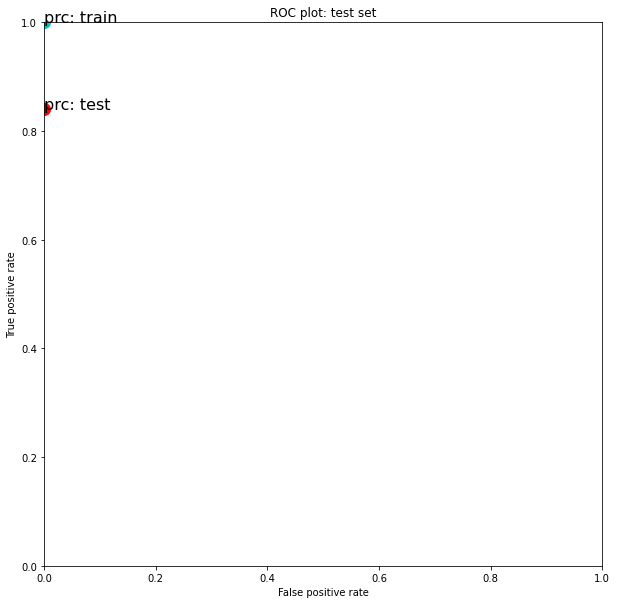

In [38]:
plt.figure(figsize=(10,10))

for fit in final_fitsN:
    if fit['set'] == 'train':
        color = 'co'
    else:
        color = 'ro'
    plt.plot(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], color, markersize=12)
    plt.text(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

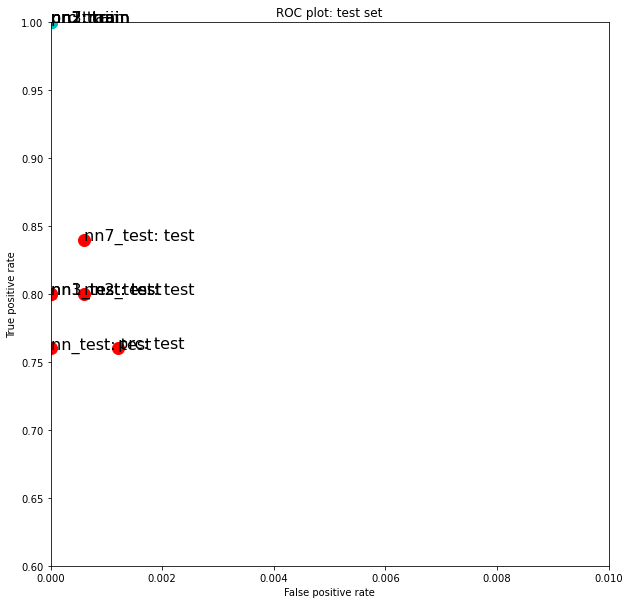

In [20]:
plt.figure(figsize=(10,10))

for fit in final_fitsN:
    if fit['set'] == 'train':
        color = 'co'
    else:
        color = 'ro'
    plt.plot(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], color, markersize=12)
    plt.text(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
plt.axis([0, 0.01, 0.6, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


In [25]:
# list of fits to compare: 
final_fitsL = []
final_fitsL.append(nn6_performance.performance_measures)
final_fitsL.append(nn6_performance_test.performance_measures)

final_fitsL.append(nn7_performance.performance_measures)
final_fitsL.append(nn7_performance_test.performance_measures)

final_fitsL.append(nn8_performance.performance_measures)
final_fitsL.append(nn8_performance_test.performance_measures)

final_fitsL.append(nn9_performance.performance_measures)
final_fitsL.append(nn9_performance_test.performance_measures)

#final_fitsL.append(nnx_performance.performance_measures)
#final_fitsL.append(nnx_performance_test.performance_measures)

#final_fitsL.append(nnxi_performance.performance_measures)
#final_fitsL.append(nnxi_performance_test.performance_measures)



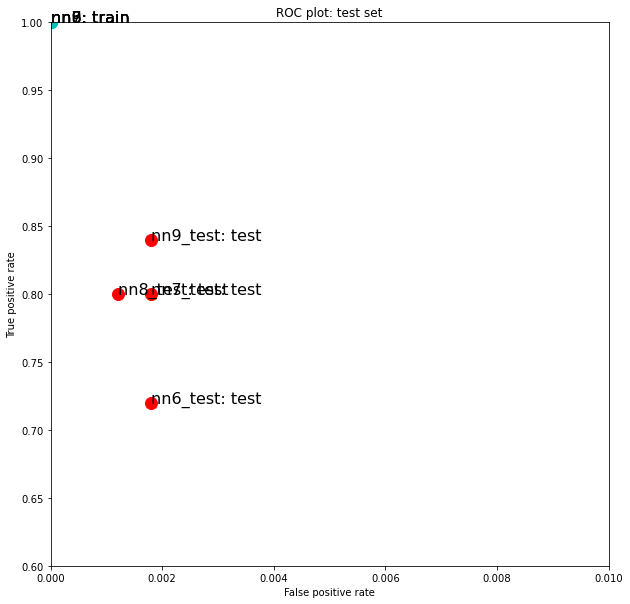

In [26]:
plt.figure(figsize=(10,10))

for fit in final_fitsL:
    if fit['set'] == 'train':
        color = 'co'
    else:
        color = 'ro'
    plt.plot(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], color, markersize=12)
    plt.text(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
plt.axis([0, 0.01, 0.6, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


# SUBMISSION

### file paths and names:

In [39]:
ls

2016-10-10T19+44+49_610Z*
__pycache__/
airplane_submission.csv
images_starter.ipynb*
my_measures.py*
new_airplane_submission.csv
plane_data/
planeimages_first_full_iteration-Copy1.ipynb
planeimages_first_full_iteration.ipynb*
test_data_for_grading/


In [40]:
submission_ci_path = 'test_data_for_grading/test_cropped_images/' # file path for cropped images for training
submission_l_file = 'test_data_for_grading/test_plane_labels.csv' # file path and file name for csv with labels

In [44]:
X_test_data, X_test_submission = process_raw_data(submission_l_file, submission_ci_path, my_random_seed=74, test=True)
print("Number of rows in the submission test set (should be 1,523): ")

First few lines of image labels: 
                   img_name
0  2016-08-02T13+50+24_430Z
1  2016-08-02T14+12+37_390Z
2  2016-08-03T12+32+21_790Z
3  2016-08-03T13+19+28_320Z
4  2016-08-05T15+24+58_670Z
Size of image label dataFrame: 
(1523, 1)
Shape of original feature representation: 
(1523, 30, 70)
Shape of flat feature representation: 
(1523, 2100)
Shape of X_test for submission:
(1523, 2100)
SUCCESS!
Number of rows in the submission test set (should be 1,523): 


### IMPORTANT CHECK: make sure that the number of columns in your training data is the same as the number of columns in this test submission!

In [45]:
print(data_train.shape)
print(X_test_data.shape)

(5068, 2100)
(1523, 2100)


Both the training set and submission test set have 525 columns. Success!

---

Choose a *single* model for your submission. In this code, I am choosing the Perceptron model fit, which is in the prc object. But you should choose the model that is performing the best for you!

In [46]:
# concatenate predictions to the id
X_test_submission["prediction"] = prc.predict(X_test_data)
# look at the proportion of positive predictions
print(X_test_submission['prediction'].mean())

ValueError: X has 2100 features per sample; expecting 8400

This is the proportion of predictions that have predicted that there is an airplane in the image.

In [94]:
print(X_test_submission.shape) # should be (1523, 2)

(1523, 2)


In [96]:
# export submission file as pdf
# CHANGE FILE PATH: 
X_test_submission.to_csv('new_airplane_submission.csv', index=False)